In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Necessary Libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Visualize the Data 

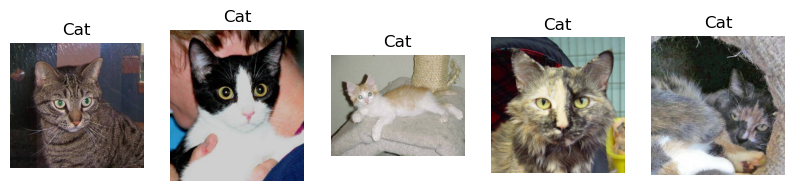

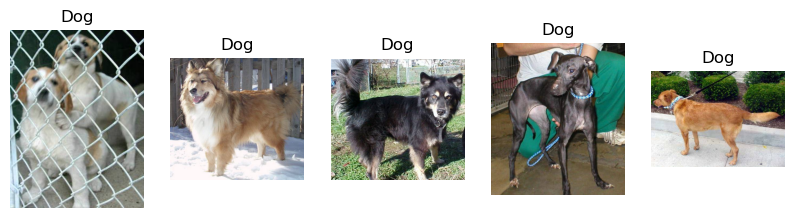

In [19]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Directory containing the training images of cats and dogs
train_cats_dir = '/kaggle/input/catsanddogsimages/Cats and Dogs/Training/Cats 15'
train_dogs_dir = '/kaggle/input/catsanddogsimages/Cats and Dogs/Training/Dogs 15'

# Visualize some images of cats
cat_images = os.listdir(train_cats_dir)[:5]  # Take the first 5 images
plt.figure(figsize=(10, 10))
for i, image in enumerate(cat_images):
    img = load_img(os.path.join(train_cats_dir, image))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Cat')
plt.show()

# Visualize some images of dogs
dog_images = os.listdir(train_dogs_dir)[:5]  # Take the first 5 images
plt.figure(figsize=(10, 10))
for i, image in enumerate(dog_images):
    img = load_img(os.path.join(train_dogs_dir, image))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Dog')
plt.show()

# Image Manipulation and Augmentation 
* using the ImageDataGenerator class from TensorFlow's Keras API

# Transformations in Data Augmentation 
* Rotation_range: This parameter specifies the range within which images can be randomly rotated. By applying random rotations, the model becomes more robust to variations in object orientations.
* width_shift_range and height_shift_range: These parameters control the range for horizontal and vertical shifts of the images, respectively. By randomly shifting the images, the model can learn to handle different object positions and improve its ability to localize objects.
* shear_range: This parameter applies random shear transformations to the images. Shearing distorts the shape of objects and helps the model learn to recognize objects under various perspectives.
* zoom_range: This parameter controls the range for random zooming of the images. Zooming in or out can introduce variations in the scale of objects, making the model more robust to changes in object sizes.
* horizontal_flip: This parameter enables random horizontal flipping of the images. Flipping images horizontally can help the model learn from different object orientations and improves its ability to handle mirror-image variations.


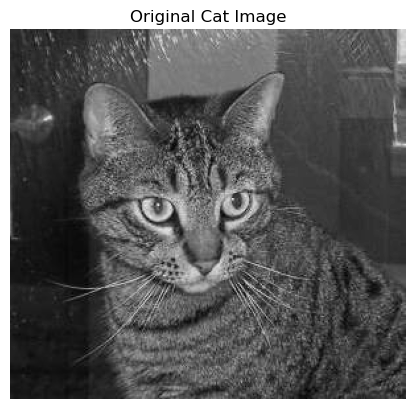

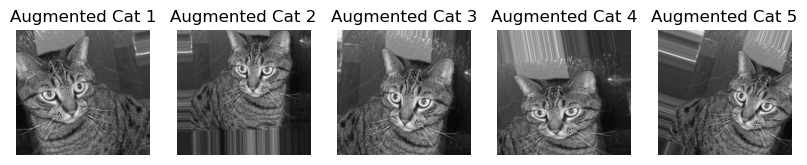

In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Directory containing the training images of cats and dogs
train_cats_dir = '/kaggle/input/catsanddogsimages/Cats and Dogs/Training/Cats 15'
train_dogs_dir = '/kaggle/input/catsanddogsimages/Cats and Dogs/Training/Dogs 15'

# Load and display an original cat image
cat_image_path = os.path.join(train_cats_dir, 'cat.1.jpg')
cat_image = cv2.imread(cat_image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale image
plt.imshow(cat_image, cmap='gray')
plt.title('Original Cat Image')
plt.axis('off')
plt.show()

# Data augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly within the range
    width_shift_range=0.2,  # Shift images horizontally randomly
    height_shift_range=0.2,  # Shift images vertically randomly
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Apply zoom transformations
    horizontal_flip=True  # Flip images horizontally randomly
)

# Reshape the grayscale image array to have three channels
cat_array = np.expand_dims(cat_image, axis=-1)
cat_array = np.repeat(cat_array, 3, axis=-1)

# Display augmented images of the cat
augmented_images = []
plt.figure(figsize=(10, 10))
for i in range(5):
    augmented_image = datagen.random_transform(cat_array)
    augmented_image = augmented_image[:, :, 0]  # Remove the extra channel
    augmented_images.append(augmented_image)
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Augmented Cat {i+1}')
plt.show()

# CNN MODEL USING TRANSFER LEARNING

* We are using the VGG16 model as the base model, which is pre-trained on ImageNet for image classification. The base model consists of convolutional and pooling layers that extract meaningful features from the input images.
* By freezing the base model's layers, you retain the pre-trained weights and prevent them from being modified during the training process.


# Reasons for Freezing the model 
* Transfer learning: The base model, such as VGG16, is pre-trained on a large dataset (e.g., ImageNet) and has learned useful features that can be generalized to various computer vision tasks. By freezing the base model's layers, you can leverage these pre-trained features without altering them, which can be particularly useful when you have a limited amount of training data.
* Preventing overfitting: Freezing the base model's layers helps to prevent overfitting, especially when you have limited training data. By keeping the base model's weights fixed, you reduce the risk of the model memorizing the training data and improve its ability to generalize to unseen data.
* Efficient training: Since the base model's layers are not updated, training becomes faster because you don't have to compute gradients and update a large number of parameters. This can be especially beneficial when working with deep and complex models like VGG16.

# WHY THERE IS A NEED TO INCLUDE ADDITIONAL LAYERS
* The additional layers added on top of the base model serve as the classifier for your specific task.
* The base model itself does not include a final classification layer that maps the extracted features to the specific classes you want to classify (in this case, cats and dogs). 
* Therefore, We add additional layers on top of the base model to create the classifier.
* We add a Flatten layer to convert the 4D feature maps into a 1D vector. This flattening step is necessary because the subsequent layers expect a 1D input. 
* Then, We add a Dense layer with 256 units and ReLU activation function to introduce non-linearity and allow the model to learn complex patterns. 
* Finally, you add a Dense layer with 1 unit and a sigmoid activation function to output a probability score indicating the likelihood of the input image belonging to the positive class (e.g., a dog)


In [21]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Create a new model on top of the base model
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


**Our model architecture consists of a VGG16 base model with its pre-trained layers frozen, followed by a Flatten layer, a Dense layer with 256 units and ReLU activation, and a final Dense layer with 1 unit and sigmoid activation.**

# Visualizing the model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 19.2 MB/s eta 0:00:0000:01


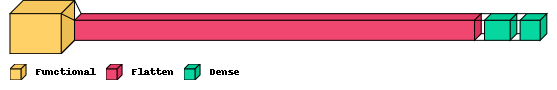

In [23]:
# Installing Visual Keras

!pip install visualkeras
import visualkeras

# Visualize the model
visualkeras.layered_view(model, scale_xy=10, legend=True)

# Training & Testing

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 15.3505 - accuracy: 0.4667 - val_loss: 100.0605 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 91.2262 - accuracy: 0.5000 - val_loss: 73.4913 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 5s 5s/step - loss: 54.3133 - accuracy: 0.5000 - val_loss: 34.7483 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 18.7713 - accuracy: 0.5333 - val_loss: 6.7319 - val_accuracy: 0.7000
Epoch 5/10
1/1 [==============================] - 4s 4s/step - loss: 1.4632 - accuracy: 0.8000 - val_loss: 1.0768 - val_accuracy: 0.8000
Epoch 6/10
1/1 [==============================] - 5s 5s/step - loss: 1.6963 - accuracy: 0.8667 - val_loss: 5.4535 - val_accuracy: 0.7000
Epoch 7/10
1/1 [==============================] - 5s 5s/step - loss: 5.7556 - accuracy: 0.

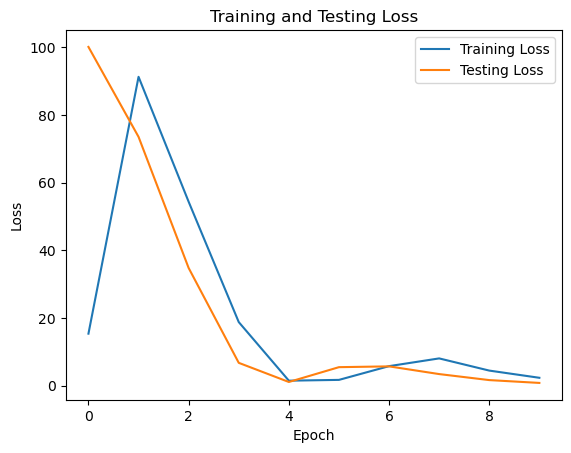

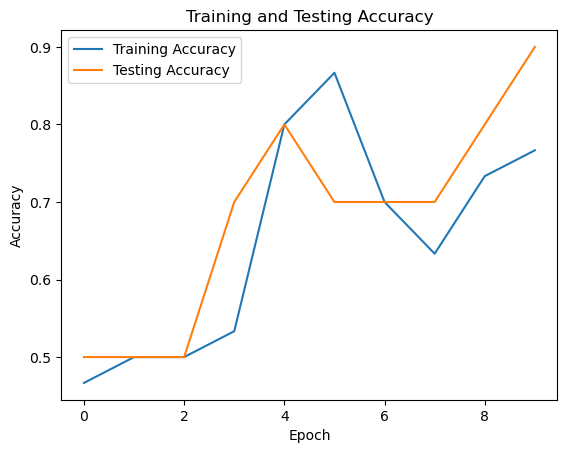

In [24]:
# Data augmentation configuration for testing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()  # No augmentation for testing data

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/catsanddogsimages/Cats and Dogs/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/catsanddogsimages/Cats and Dogs/Testing',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data = test_generator)

# Plot the combined loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Testing Loss'])
plt.show()

# Plot the combined accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.show()

# METRICS PARAMETERS

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


# Predict the classes for the testing data
y_pred = model.predict(test_generator)
y_pred_classes = np.round(y_pred)  # Convert probabilities to class labels (0 or 1)

# Get the true class labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)

# Print the confusion matrix
print('Confusion Matrix:', cm)
print('Precision:', precision) #The precision indicates the proportion 
#of correctly predicted positive samples (cats) out of all samples predicted as positive.
print('Recall:', recall) #The recall represents the proportion of correctly 
#predicted positive samples out of all actual positive samples. 
print('F1 Score:', f1) #The F1 score is the harmonic mean of precision and recall, 
#providing a balanced measure of the model's performance.
print('Accuracy:', accuracy)

1/1 [==============================] - 1s 1s/step
Confusion Matrix: [[4 1]
 [2 3]]
Precision: 0.75
Recall: 0.6
F1 Score: 0.6666666666666665
Accuracy: 0.7


# LET'S SEE THE RESULTS !!!

1/1 [==============================] - 1s 531ms/step


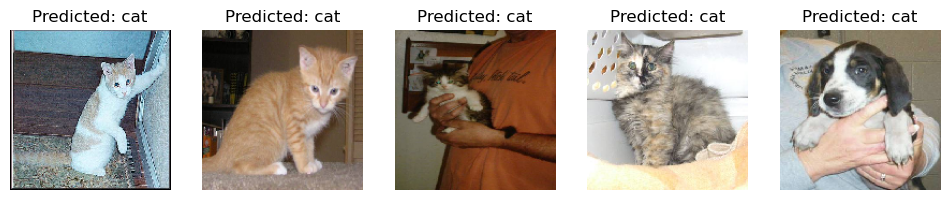

In [35]:
import random

# Select a random sample of images
sample_size = 5
random_images = random.sample(test_generator.filepaths, sample_size)

# Load and preprocess the random sample images
sample_images = []
for image_path in random_images:
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    sample_images.append(img_array)

sample_images = np.array(sample_images)

# Predict the labels for the random sample images
predictions = model.predict(sample_images)
predicted_labels = np.round(predictions).flatten()

# Get the class labels ("cat" and "dog")
class_labels = ['cat', 'dog']

# Display the random sample images with predicted labels
plt.figure(figsize=(12, 8))
for i in range(sample_size):
    plt.subplot(1, sample_size, i+1)
    plt.imshow(sample_images[i])
    plt.axis('off')
    label = class_labels[int(predicted_labels[i])]
    plt.title('Predicted: {}'.format(label))
plt.show()

# Reason why the Model Works 
* Transfer Learning: By using the VGG16 base model, you benefit from its pre-trained weights on ImageNet, which enables the model to learn rich and meaningful image features. This helps in capturing relevant patterns and structures in the images of cats and dogs.
* Fine-tuning: Although we froze the pre-trained layers of the base model, the added Dense layers on top allow the model to adapt and learn task-specific representations. This fine-tuning of the top layers enhances the model's ability to classify cats and dogs accurately.
* Data Augmentation : By applying data augmentation techniques during training, you increase the diversity of the training data. This helps in reducing overfitting and improving the model's generalization ability.
* Optimization: The model is compiled with the Adam optimizer, which is known for its efficiency in updating model weights. The binary cross-entropy loss function is appropriate for binary classification tasks, such as distinguishing between cats and dogs.
